# Πρώτη Εργασία
## Διερευνώντας τον καιρό στην Αθήνα
---
> Λάζαρος Πανιτσίδης <br/>
> lazarospanitsidis@outlook.com

### Ε1: Συγκέντρωση των Δεδομένων

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_filename = "noaa_hellinikon_1995_2020.csv.zip"
data_55 = pd.read_csv(data_filename)
data_55 = data_55[['DATE','TAVG']]
data_55

,DATE,TAVG
0,1955-01-01,NaN
1,1955-01-02,NaN
2,1955-01-03,NaN
3,1955-01-04,NaN
4,1955-01-05,NaN
...,...,...
23246,2020-12-27,16.6
23247,2020-12-28,14.8
23248,2020-12-29,16.3
23249,2020-12-30,16.4


* Φτιάχνεται μία νέα στήλη 'date' , στην οποία μετρατρέπεται την 'DATE' που είναι τύπου object , σε στήλη τύπου datetime.
* Απενεργοποιείται το SettingWithCopyWarning , το οποίο εμφανίζεται κατά την μετατροπή σε datetime.

In [3]:
import datetime as dt
pd.options.mode.chained_assignment = None  # default='warn'

In [4]:
data_55['date'] = pd.to_datetime(data_55['DATE'])
data_55.dtypes

DATE            object
TAVG           float64
date    datetime64[ns]
dtype: object

* Οι τιμές που λείπουν συμπληρώνονται από το mean κάθε μήνα.

In [5]:
for i in range(1,13):
    print('The Mean of the' , (i) , 'Month is :')
    print(data_55.loc[(data_55['date'].dt.month==(i))].mean())
    data_55[data_55['date'].dt.month==(i)] = data_55.fillna(data_55.loc[(data_55['date'].dt.month==(i))].mean())

The Mean of the 1 Month is :


C:\Users\Λάζαρος Πανιτσίδης\AppData\Local\Temp\ipykernel_5892\2514474263.py:3: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  print(data_55.loc[(data_55['date'].dt.month==(i))].mean())
C:\Users\Λάζαρος Πανιτσίδης\AppData\Local\Temp\ipykernel_5892\2514474263.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(data_55.loc[(data_55['date'].dt.month==(i))].mean())
C:\Users\Λάζαρος Πανιτσίδης\AppData\Local\Temp\ipykernel_5892\2514474263.py:4: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  data_55[data_55['date'].dt.month==(i)] = data_55.fillna(data_55.loc[(data_55['date'].dt.month==(i))].mean())
C:\Users\Λάζαρος Πανιτσίδης\

TAVG    9.985857
dtype: float64
The Mean of the 2 Month is :
TAVG    10.42892
dtype: float64
The Mean of the 3 Month is :
TAVG    12.313515
dtype: float64
The Mean of the 4 Month is :
TAVG    15.680434
dtype: float64
The Mean of the 5 Month is :
TAVG    20.170261
dtype: float64
The Mean of the 6 Month is :
TAVG    24.805879
dtype: float64
The Mean of the 7 Month is :
TAVG    27.762683
dtype: float64
The Mean of the 8 Month is :
TAVG    27.741827
dtype: float64
The Mean of the 9 Month is :
TAVG    24.059848
dtype: float64
The Mean of the 10 Month is :
TAVG    19.414294
dtype: float64
The Mean of the 11 Month is :
TAVG    15.238013
dtype: float64
The Mean of the 12 Month is :
TAVG    11.773103
dtype: float64


In [6]:
data_55 = data_55[['date','TAVG']]
data_55

,date,TAVG
0,1955-01-01,9.985857
1,1955-01-02,9.985857
2,1955-01-03,9.985857
3,1955-01-04,9.985857
4,1955-01-05,9.985857
...,...,...
23246,2020-12-27,16.600000
23247,2020-12-28,14.800000
23248,2020-12-29,16.300000
23249,2020-12-30,16.400000


In [7]:
data_athens = pd.read_csv('athens.csv' , header=None)
data_athens.columns = ["DATE" , "TAVG" , "TMAX" , "TMIN" , "RHAVG" , "RHMAX" , "RHMIN" , "PAVG" , "PMAX" , "PMIN" , "DR" , "WS" , "WD" , "WG"]
data_athens

,DATE,TAVG,TMAX,TMIN,RHAVG,RHMAX,RHMIN,PAVG,PMAX,PMIN,DR,WS,WD,WG
0,2010-01-01,17.9,18.1,17.8,61.4,91,33,1003.6,1006.3,1002.0,0.2,4.0,WSW,12.7
1,2010-01-02,15.6,15.7,15.5,57.4,70,45,1005.2,1008.7,1001.5,0.0,6.8,WSW,20.7
2,2010-01-03,13.5,13.6,13.4,56.0,76,39,1011.7,1016.7,1008.6,0.0,5.0,WSW,15.4
3,2010-01-04,9.5,9.6,9.5,50.7,60,38,1021.3,1023.1,1016.8,0.0,4.3,NNE,11.0
4,2010-01-05,13.4,13.5,13.4,70.5,82,54,1018.7,1022.1,1015.5,0.0,7.9,S,19.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3647,2019-12-27,10.1,10.2,10.0,60.3,79,44,1018.4,1019.9,1016.8,0.0,2.9,NE,8.0
3648,2019-12-28,8.3,8.4,8.2,60.9,82,46,1016.0,1017.2,1014.2,7.2,4.3,NE,12.8
3649,2019-12-29,6.4,6.5,6.4,73.4,82,66,1017.6,1018.9,1016.5,3.4,10.6,NNE,24.5
3650,2019-12-30,4.0,4.0,3.9,83.9,90,65,1020.0,1024.2,1016.6,12.4,5.1,NE,15.0


* Κάθε γραμμή του αρχείου αποτελείται από 14 στήλες. Η πρώτη στήλη είναι η ημέρα την οποία αφορούν οι παράμετροι (YYYY-MM-DD). Έπειτα έχουμε μέση, μέγιστη και ελάχιστη θερμοκρασία ημέρας (°C). Συνεχίζουν αντίστοιχες τιμές για την σχετική υγρασία και την πίεση (%, hPa). Μετά έχουμε την αθροιστική βροχόπτωση της ημέρας (mm). Οι τελευταίες τρεις στήλες αφορούν τον άνεμο. Δίνεται η μέση ταχύτητα και την επικρατούσα διεύθυνση του ανέμου, ενώ στην τελευταία στήλη, η μέγιστη ριπή (km/h). **Πηγή** : [Hellenic Data Service](https://data.hellenicdataservice.gr/dataset/66e1c19a-7b0e-456f-b465-b301a1130e3f/resource/a7c024b3-8606-4f08-93e2-2042f5bd6748).

In [8]:
data_athens.dtypes

DATE      object
TAVG      object
TMAX      object
TMIN      object
RHAVG    float64
RHMAX      int64
RHMIN      int64
PAVG     float64
PMAX     float64
PMIN     float64
DR       float64
WS       float64
WD        object
WG       float64
dtype: object

In [9]:
# data = pd.merge(data_55,data_athens, left_index=True, right_index=True) #TODO TEST
# data

* Κατά τη χρήση της μεθόδου merge() , έβγαλε ότι στη σειρά 515 δεν υπάρχει αριθμός. Στην σειρά αυτή υπήρχε "---" , οπότε κατά την αναζήτηση αυτής της συμβολοσειράς στο athens.csv , παρατηρήθηκε ότι υπήρχε και σε άλλα σημεία το ίδιο. Άρα γίνεται μετατροπή του "---" σε NaN.
* Επίσης , οι θερμοκρασίες μετατρέπονται σε τύπου float από τύπου object.

In [10]:
data_athens['TAVG'][data_athens['TAVG'] == "---"] = np.nan
data_athens['TAVG'] = data_athens['TAVG'].astype("float")
data_athens.isnull().sum()

DATE     0
TAVG     3
TMAX     0
TMIN     0
RHAVG    0
RHMAX    0
RHMIN    0
PAVG     0
PMAX     0
PMIN     0
DR       0
WS       0
WD       0
WG       0
dtype: int64

* Χρησιμοποιείται η μέθοδος της γραμμικής παρεμβολής για να γεμιστούν οι τιμές ΝaN , διότι τα δεδομένα ακολουθούν μια γραμμική σχέση , καθώς πολύ σπάνια υπάρχουν μεγάλες διακυμάνσεις της θερμοκρασίας.

In [11]:
data_athens = data_athens.interpolate()
data_athens

,DATE,TAVG,TMAX,TMIN,RHAVG,RHMAX,RHMIN,PAVG,PMAX,PMIN,DR,WS,WD,WG
0,2010-01-01,17.9,18.1,17.8,61.4,91,33,1003.6,1006.3,1002.0,0.2,4.0,WSW,12.7
1,2010-01-02,15.6,15.7,15.5,57.4,70,45,1005.2,1008.7,1001.5,0.0,6.8,WSW,20.7
2,2010-01-03,13.5,13.6,13.4,56.0,76,39,1011.7,1016.7,1008.6,0.0,5.0,WSW,15.4
3,2010-01-04,9.5,9.6,9.5,50.7,60,38,1021.3,1023.1,1016.8,0.0,4.3,NNE,11.0
4,2010-01-05,13.4,13.5,13.4,70.5,82,54,1018.7,1022.1,1015.5,0.0,7.9,S,19.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3647,2019-12-27,10.1,10.2,10.0,60.3,79,44,1018.4,1019.9,1016.8,0.0,2.9,NE,8.0
3648,2019-12-28,8.3,8.4,8.2,60.9,82,46,1016.0,1017.2,1014.2,7.2,4.3,NE,12.8
3649,2019-12-29,6.4,6.5,6.4,73.4,82,66,1017.6,1018.9,1016.5,3.4,10.6,NNE,24.5
3650,2019-12-30,4.0,4.0,3.9,83.9,90,65,1020.0,1024.2,1016.6,12.4,5.1,NE,15.0


In [12]:
data_athens['date'] = pd.to_datetime(data_athens['DATE'])
data_athens = data_athens[['date','TAVG']]

* Τέλος , ενώνονται τα 2 dataframes με τη μέθοδο fillna , έτσι ώστε τα δεδομένα από το data_athens να "καλύψουν" τα δεδομένα του data_55 από την ημερομηνία 2010-01-01 και μετά. Αν γινόταν εφαρμογή της μεθόδου merge χωρίς καμία άλλη παραμετροποίηση , στο τελικό dataframe θα υπήρχαν μόνο όσες τιμές έχει το μικρότερο dataframe.

In [13]:
data = data_55.fillna(data_athens[['date', 'TAVG']])
data

,date,TAVG
0,1955-01-01,9.985857
1,1955-01-02,9.985857
2,1955-01-03,9.985857
3,1955-01-04,9.985857
4,1955-01-05,9.985857
...,...,...
23246,2020-12-27,16.600000
23247,2020-12-28,14.800000
23248,2020-12-29,16.300000
23249,2020-12-30,16.400000


### Ε2: Απόκλιση Καλοκαιρινών Θερμοκρασιών

* Αρχικά παίρνονται από το dataframe οι ημερομηνίες που είναι χρήσιμες για την εύρεση της μέσης θερμοκρασίας που ζητείται και αυτές για τον υπολογισμό του κυλιόμενου μέσου όρου 10 ετών. Αυτές είναι τα καλοκαίρια από κάθε έτος από το 1974 ως το 1999 και τα καλοκαίρια από το 1955 ως το 2020.

In [15]:
start_date = '1974-06-01'
end_date = '1999-08-31'
mask = (data['date'] >= start_date) & (data['date'] <= end_date)
data_74_99 = data.loc[mask]
data_74_99

,date,TAVG
7091,1974-06-01,22.7
7092,1974-06-02,23.2
7093,1974-06-03,22.2
7094,1974-06-04,21.0
7095,1974-06-05,24.0
...,...,...
16309,1999-08-27,24.7
16310,1999-08-28,24.7
16311,1999-08-29,25.3
16312,1999-08-30,25.9


* Ορίζεται μια συνάρτηση η οποία επιστρέφει 3 μήνες.

In [15]:
def getMonths(input, m1, m2, m3):
    return input.loc[(input.date.dt.month==m1) | (input.date.dt.month==m2) | (input.date.dt.month==m3)]

data_74_99_summers = getMonths(data_74_99,6,7,8)
data_74_99_summers

,date,TAVG
7091,1974-06-01,22.7
7092,1974-06-02,23.2
7093,1974-06-03,22.2
7094,1974-06-04,21.0
7095,1974-06-05,24.0
...,...,...
16309,1999-08-27,24.7
16310,1999-08-28,24.7
16311,1999-08-29,25.3
16312,1999-08-30,25.9


In [16]:
data_summers = getMonths(data,6,7,8)
data_summers

,date,TAVG
151,1955-06-01,24.805879
152,1955-06-02,24.805879
153,1955-06-03,24.805879
154,1955-06-04,24.805879
155,1955-06-05,24.805879
...,...,...
23124,2020-08-27,28.300000
23125,2020-08-28,29.500000
23126,2020-08-29,29.300000
23127,2020-08-30,27.800000


* Υπολογίζεται ο κυλιόμενος μέσος όρος 10 χρόνων. (10 χρόνια * 92 μέρες του καλοκαιριού)

In [17]:
mean = data_74_99_summers['TAVG'].mean()
data_summers['TAVG_DIFF'] = data_summers['TAVG'] - mean
data_summers['10YR_TAVG'] = data_summers['TAVG_DIFF'].rolling(window=10*92 , min_periods=1).mean()
data_summers

,date,TAVG,TAVG_DIFF,10YR_TAVG
151,1955-06-01,24.805879,-1.430089,-1.430089
152,1955-06-02,24.805879,-1.430089,-1.430089
153,1955-06-03,24.805879,-1.430089,-1.430089
154,1955-06-04,24.805879,-1.430089,-1.430089
155,1955-06-05,24.805879,-1.430089,-1.430089
...,...,...,...,...
23124,2020-08-27,28.300000,2.064032,1.744467
23125,2020-08-28,29.500000,3.264032,1.748489
23126,2020-08-29,29.300000,3.064032,1.753489
23127,2020-08-30,27.800000,1.564032,1.756532


* Εφόσον έχουν γίνει ήδη οι υπολογισμοί , διώχνονται όσες τιμές της διαφοράς της μέσης θερμοκρασίας έχουν μεγάλη απόκλιση με την μέγιστη και την ελάχιστη τιμή του κυλιόμενου μέσου όρου δέκα ετών , έτσι ώστε το γράφημά να είναι πιο ξεκάθαρο.

In [18]:
data_summers['10YR_TAVG'].max()

1.857945490073271

In [19]:
data_summers['10YR_TAVG'].min()

-1.4300886935475143

* Ελέγχεται αν υπάρχουν ακρέες τιμές διαφοράς θερμοκρασίας.

In [20]:
data_summers[(data_summers['TAVG_DIFF']<-2) | (data_summers['TAVG_DIFF']>3)]

,date,TAVG,TAVG_DIFF,10YR_TAVG
912,1957-07-01,22.4,-3.835968,0.258027
917,1957-07-06,29.6,3.364032,0.274981
919,1957-07-08,29.7,3.464032,0.296504
920,1957-07-09,31.5,5.264032,0.318780
926,1957-07-15,29.3,3.064032,0.362761
...,...,...,...,...
23120,2020-08-23,30.4,4.164032,1.719576
23121,2020-08-24,29.7,3.464032,1.727293
23125,2020-08-28,29.5,3.264032,1.748489
23126,2020-08-29,29.3,3.064032,1.753489


In [21]:
data_summers.drop(data_summers[data_summers['TAVG_DIFF'] <-2].index, inplace = True)
data_summers.drop(data_summers[data_summers['TAVG_DIFF'] >3].index, inplace = True)
data_summers

,date,TAVG,TAVG_DIFF,10YR_TAVG
151,1955-06-01,24.805879,-1.430089,-1.430089
152,1955-06-02,24.805879,-1.430089,-1.430089
153,1955-06-03,24.805879,-1.430089,-1.430089
154,1955-06-04,24.805879,-1.430089,-1.430089
155,1955-06-05,24.805879,-1.430089,-1.430089
...,...,...,...,...
23118,2020-08-21,28.200000,1.964032,1.703815
23122,2020-08-25,28.900000,2.664032,1.734685
23123,2020-08-26,28.900000,2.664032,1.740772
23124,2020-08-27,28.300000,2.064032,1.744467


In [22]:
# για να διώξω τις τιμές που δεν ακολουθούν τον κυλιόμενο μέσο
# data_summers.drop(data_summers[data_summers['TAVG_DIFF'] < data_summers[data_summers['10YR_TAVG']-2].index, inplace = True)
# data_summers.drop(data_summers[data_summers['TAVG_DIFF'] > data_summers[data_summers['10YR_TAVG']+2].index, inplace = True)
# data_summers

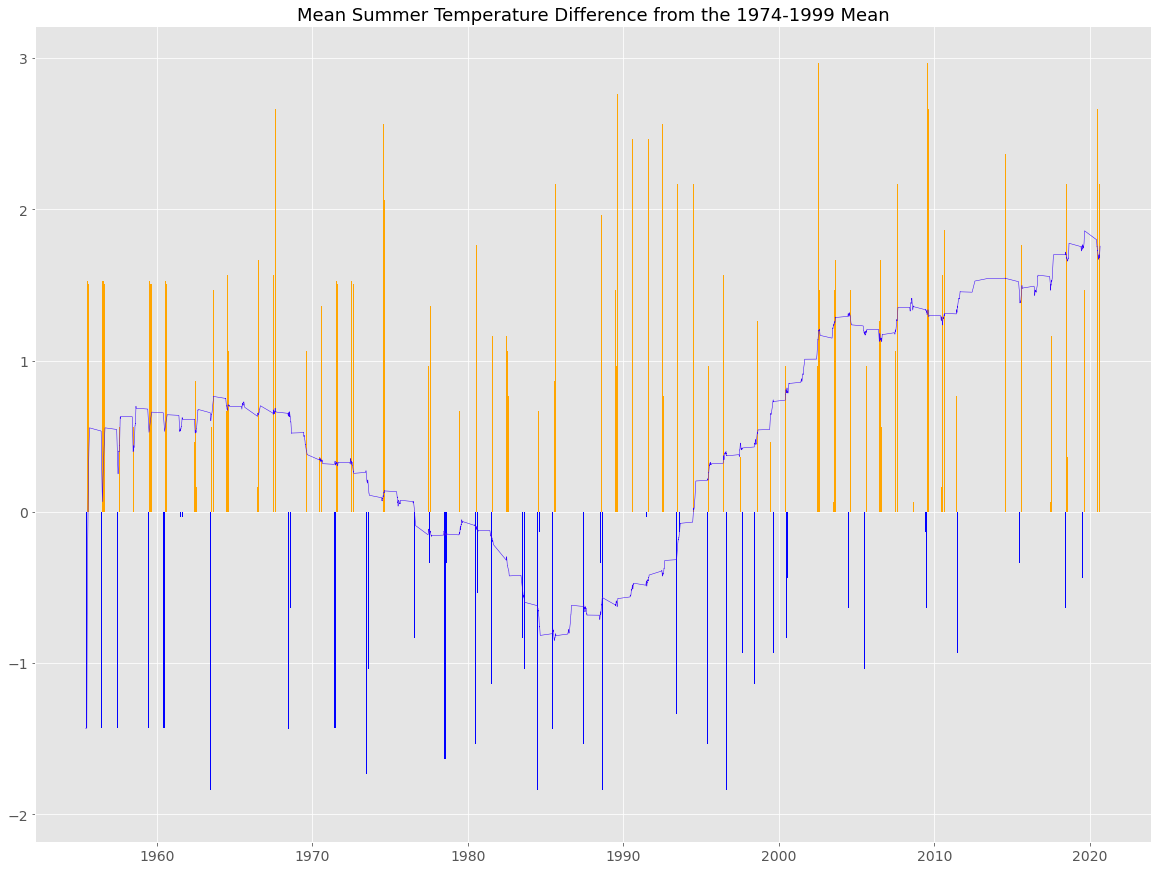

In [23]:
plt.figure(figsize=(20,15))
plt.style.use('ggplot')
plt.bar(data_summers['date'], data_summers['TAVG_DIFF'], color=np.where(data_summers['TAVG_DIFF']<0, 'blue', 'orange'))
plt.plot(data_summers['date'], data_summers['10YR_TAVG'], color='#3503fc' , linewidth=0.5)
plt.title('Mean Summer Temperature Difference from the 1974-1999 Mean', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

 * Οι ανωμαλίες της μέσης θερμοκρασίας του καλοκαιριού στην Ελλάδα από το 1955 έως το 2020 δίνονται στο παραπάνω σχήμα. Είναι αξιοσημείωτο ότι η μέση θερμοκρασία του καλοκαιριού παρέμεινε σχετικά χαμηλή πριν από το 1995 περίπου , ενώ έπειτα ξεκίνησε να ανεβαίνει συνεχώς.

### Ε3: Εξέλιξη Ημερήσιων Θερμοκρασιών

* Αρχικά φτιάχνεται ένα dataframe στο οποίο οι στήλες είναι τα έτη και γραμμές οι μέρες του κάθε μήνα. Αυτό γίνεται για να κάνουμε στο γράφημα μία γραμμή για κάθε έτος με την πορεία της θερμοκρασίας του.

In [24]:
data_pivot=pd.pivot_table(data, values='TAVG', index=[data.date.dt.dayofyear] , columns=data.date.dt.year)
data_pivot

date,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
date,,,,,,,,,,,,,,,,,,,,,
1,9.985857,9.985857,9.985857,12.1,9.985857,9.985857,12.0,12.9,15.1,9.2,...,9.9,10.2,NaN,NaN,4.4,3.8,6.0,11.3,8.3,8.4
2,9.985857,9.985857,9.985857,11.8,9.985857,9.985857,12.2,13.7,13.9,9.3,...,11.5,9.5,NaN,NaN,4.5,7.9,8.4,13.7,7.4,7.1
3,9.985857,9.985857,9.985857,12.1,9.985857,9.985857,13.6,16.8,13.2,7.6,...,11.0,9.7,NaN,NaN,5.5,11.5,11.1,11.5,6.4,8.9
4,9.985857,9.985857,9.985857,10.3,9.985857,9.985857,13.8,11.7,16.4,10.4,...,9.8,11.3,NaN,NaN,11.1,13.4,11.8,9.6,5.7,10.4
5,9.985857,9.985857,9.985857,8.5,9.985857,9.985857,15.3,8.8,15.0,8.7,...,9.3,11.1,NaN,NaN,6.2,17.2,13.2,10.4,3.9,9.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,11.773103,11.773103,9.800000,12.4,11.773103,11.773103,16.4,14.3,12.4,14.0,...,9.4,NaN,NaN,11.9,11.8,10.8,14.3,8.8,8.6,16.6
363,11.773103,11.773103,11.900000,13.5,11.773103,11.773103,17.5,13.3,8.8,12.1,...,8.6,NaN,NaN,14.2,12.4,7.2,12.7,10.8,5.9,14.8
364,11.773103,11.773103,15.700000,11.2,11.773103,11.773103,14.1,16.5,8.4,11.8,...,11.8,NaN,NaN,5.1,9.9,3.9,11.3,10.6,4.2,16.3


* Οι τιμές NaN συμπληρώνονται από τον μέσο όρο των θερμοκρασιών κάθε ημέρας όλων των ετών.

In [25]:
data_pivot=data_pivot.T.fillna(data_pivot.mean(axis=1)).T
data_pivot

date,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
date,,,,,,,,,,,,,,,,,,,,,
1,9.985857,9.985857,9.985857,12.100000,9.985857,9.985857,12.000000,12.900000,15.100000,9.2,...,9.900000,10.200000,10.603362,10.603362,4.400000,3.8,6.000000,11.300000,8.300000,8.4
2,9.985857,9.985857,9.985857,11.800000,9.985857,9.985857,12.200000,13.700000,13.900000,9.3,...,11.500000,9.500000,10.709612,10.709612,4.500000,7.9,8.400000,13.700000,7.400000,7.1
3,9.985857,9.985857,9.985857,12.100000,9.985857,9.985857,13.600000,16.800000,13.200000,7.6,...,11.000000,9.700000,10.637737,10.637737,5.500000,11.5,11.100000,11.500000,6.400000,8.9
4,9.985857,9.985857,9.985857,10.300000,9.985857,9.985857,13.800000,11.700000,16.400000,10.4,...,9.800000,11.300000,10.272112,10.272112,11.100000,13.4,11.800000,9.600000,5.700000,10.4
5,9.985857,9.985857,9.985857,8.500000,9.985857,9.985857,15.300000,8.800000,15.000000,8.7,...,9.300000,11.100000,10.048674,10.048674,6.200000,17.2,13.200000,10.400000,3.900000,9.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,11.773103,11.773103,9.800000,12.400000,11.773103,11.773103,16.400000,14.300000,12.400000,14.0,...,9.400000,11.480291,11.480291,11.900000,11.800000,10.8,14.300000,8.800000,8.600000,16.6
363,11.773103,11.773103,11.900000,13.500000,11.773103,11.773103,17.500000,13.300000,8.800000,12.1,...,8.600000,11.574041,11.574041,14.200000,12.400000,7.2,12.700000,10.800000,5.900000,14.8
364,11.773103,11.773103,15.700000,11.200000,11.773103,11.773103,14.100000,16.500000,8.400000,11.8,...,11.800000,11.308416,11.308416,5.100000,9.900000,3.9,11.300000,10.600000,4.200000,16.3


* Υπολογίζεται ο κυλιόμενος μέσος όρος 30 ημερών για κάθε έτος.

In [26]:
data_pivot_ra = data_pivot.rolling(window=30 , min_periods=1).mean()
data_pivot_ra

date,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
date,,,,,,,,,,,,,,,,,,,,,
1,9.985857,9.985857,9.985857,12.100000,9.985857,9.985857,12.000000,12.900000,15.100000,9.200000,...,9.900000,10.200000,10.603362,10.603362,4.400000,3.800000,6.000000,11.300000,8.300000,8.400000
2,9.985857,9.985857,9.985857,11.950000,9.985857,9.985857,12.100000,13.300000,14.500000,9.250000,...,10.700000,9.850000,10.656487,10.656487,4.450000,5.850000,7.200000,12.500000,7.850000,7.750000
3,9.985857,9.985857,9.985857,12.000000,9.985857,9.985857,12.600000,14.466667,14.066667,8.700000,...,10.800000,9.800000,10.650237,10.650237,4.800000,7.733333,8.500000,12.166667,7.366667,8.133333
4,9.985857,9.985857,9.985857,11.575000,9.985857,9.985857,12.900000,13.775000,14.650000,9.125000,...,10.550000,10.175000,10.555705,10.555705,6.375000,9.150000,9.325000,11.525000,6.950000,8.700000
5,9.985857,9.985857,9.985857,10.960000,9.985857,9.985857,13.380000,12.780000,14.720000,9.040000,...,10.300000,10.360000,10.454299,10.454299,6.340000,10.760000,10.100000,11.300000,6.340000,8.880000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,12.004097,12.119594,10.636667,12.983333,12.004097,12.119594,12.766667,11.543333,13.956667,13.536667,...,12.966667,11.965583,11.965583,13.990000,11.803333,9.983333,12.676667,10.710000,13.613333,14.086667
363,11.888600,12.004097,10.626667,13.086667,11.888600,12.004097,12.770000,11.413333,13.733333,13.476667,...,12.793333,11.893277,11.893277,13.900000,11.703333,9.723333,12.693333,10.733333,13.160000,14.153333
364,11.773103,11.888600,10.776667,13.130000,11.773103,11.888600,12.676667,11.386667,13.583333,13.276667,...,12.763333,11.818575,11.818575,13.483333,11.616667,9.466667,12.493333,10.796667,12.700000,14.153333


* Γίνεται η ίδια διαδικασία για την περίοδο 1974-1999 , ώστε να βρεθεί η ζητούμενη μαύρη γραμμή για το γράφημα.

In [27]:
data_pivot_74_99=pd.pivot_table(data_74_99, values='TAVG', index=[data_74_99.date.dt.dayofyear] , columns=data_74_99.date.dt.year)
data_pivot_74_99=data_pivot_74_99.T.fillna(data_pivot_74_99.mean(axis=1)).T
data_pivot_74_99['mean']=data_pivot_74_99.mean(axis=1)
data_pivot_74_99['30DR_TAVG'] = data_pivot_74_99['mean'].rolling(window=30 , min_periods=1).mean()
data_pivot_74_99

date,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,...,1992,1993,1994,1995,1996,1997,1998,1999,mean,30DR_TAVG
date,,,,,,,,,,,,,,,,,,,,,
1,10.316000,8.700000,11.3,10.200000,7.000000,16.600000,10.7,8.000000,11.700000,1.800000,...,3.6,8.000000,12.100000,17.600000,13.9,12.700000,9.400000,9.100000,10.316000,10.316000
2,10.588000,7.500000,12.4,9.100000,4.600000,14.200000,11.3,8.200000,14.800000,4.700000,...,5.1,8.200000,12.200000,17.600000,14.1,11.700000,10.400000,10.200000,10.588000,10.452000
3,10.128000,7.800000,13.6,9.100000,6.100000,4.400000,11.2,6.400000,11.300000,5.600000,...,9.4,9.400000,10.300000,12.500000,12.7,12.800000,12.000000,13.200000,10.128000,10.344000
4,9.588000,7.200000,13.6,7.400000,8.900000,3.800000,4.9,11.800000,10.000000,7.800000,...,9.5,7.500000,10.200000,10.500000,9.9,15.300000,12.500000,13.300000,9.588000,10.155000
5,9.932000,7.700000,8.4,6.200000,9.400000,15.300000,3.3,13.100000,10.600000,9.800000,...,10.7,5.300000,12.300000,11.200000,8.3,15.300000,12.700000,10.900000,9.932000,10.110400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,11.600000,8.700000,8.2,7.900000,14.000000,7.100000,9.9,10.000000,9.000000,12.100000,...,5.2,12.800000,9.900000,15.800000,6.4,12.800000,9.300000,9.996000,9.996000,11.481200
363,11.600000,9.600000,5.6,12.100000,14.100000,8.800000,11.0,11.600000,8.900000,10.400000,...,5.1,11.700000,9.600000,15.100000,5.7,12.700000,9.800000,10.476000,10.476000,11.394000
364,12.000000,9.700000,7.0,15.000000,14.900000,11.700000,9.3,14.700000,5.300000,10.300000,...,6.4,13.800000,10.900000,13.700000,7.5,11.200000,10.700000,10.916000,10.916000,11.340800


In [28]:
from matplotlib.dates import DateFormatter
import cycler
import matplotlib as mpl

Text(0, 0.5, 'Average Daily Temperature')

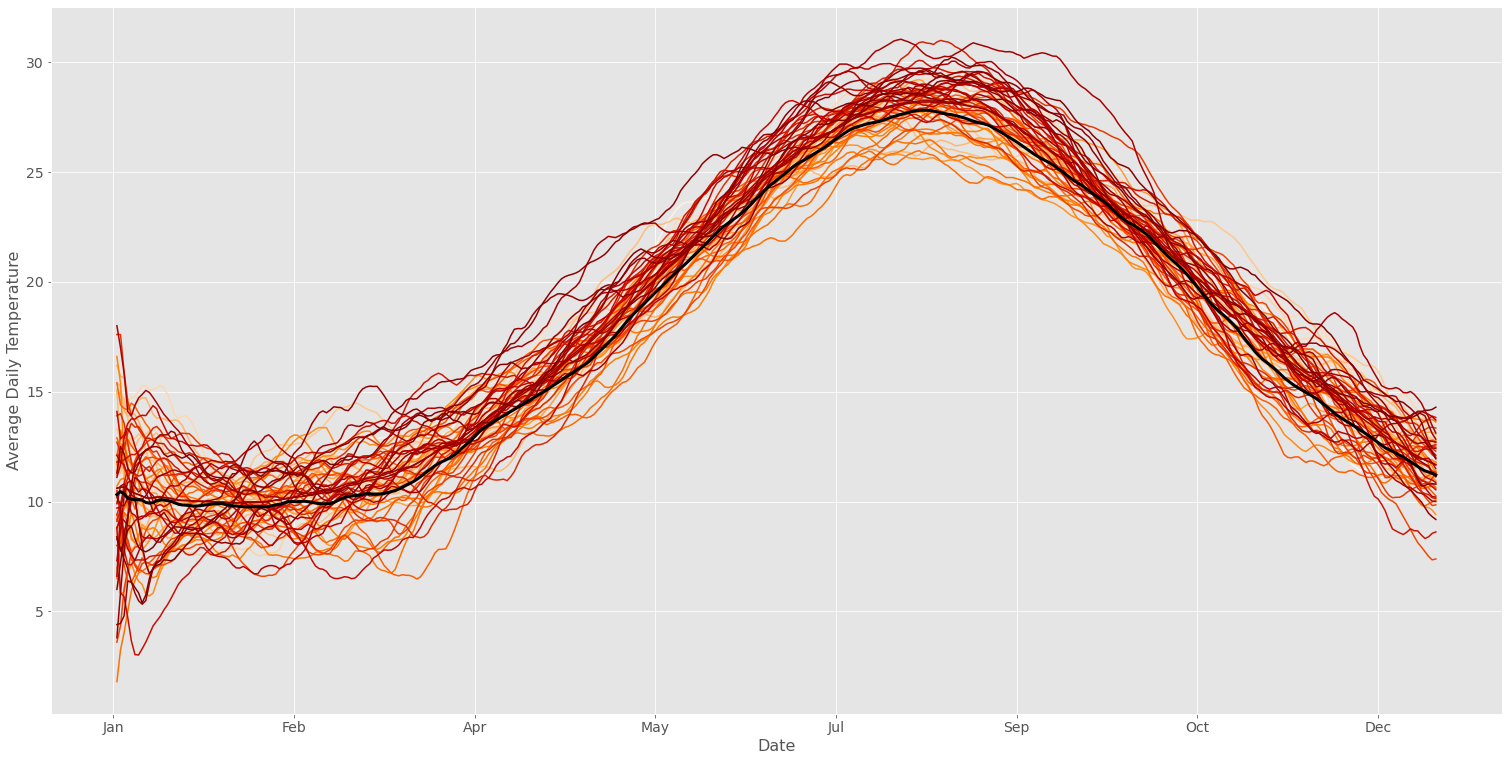

In [29]:
color = plt.cm.gist_heat_r(np.linspace(0, 1,100))
mpl.rcParams['axes.prop_cycle'] = cycler.cycler('color', color)
fig, ax = plt.subplots(figsize=(26,13))
ax.plot(data_pivot_ra)
ax.plot(data_pivot_74_99['30DR_TAVG'],color='k',linewidth=3)
ax.xaxis.set_major_formatter(DateFormatter('%b'))

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Average Daily Temperature', fontsize=16)

* Στο παραπάνω γράφημα απεικονίζεται η μέση θερμοκρασία κάθε ημέρας , για κάθε έτος από το 1955 έως το 2020 , εξομαλυμένη σε ένα κυλιομένο παράθυρο 30 ημερών (30 days rolling average). Το χρώμα της κάθε γραμμής γίνεται όλο και πιο σκούρο όσο περνάνε τα χρόνια και η μαύρη γραμμή είναι η μέση θερμοκρασία αναφοράς κάθε ημέρας για την περίοδο 1974-1999 εξομαλυμένη και αυτή σε ένα κυλιομένο παράθυρο 30 ημερών.
* Είναι εμφανές ότι όσο περνάνε τα χρόνια η μέση θερμοκρασία κάθε ημέρας αυξάνεται , καθώς οι πιο σκουρόχρωμες γραμμές είναι συσσωρευμένες στις υψηλότερες θερμοκρασίες. Αυτή η παρατήρηση είναι πιο ξεκάθαρη στις περιόδους της άνοιξης και του καλοκαιριού, το οποίο σημαίνει ότι τον χειμώνα και το φθινόπωρο η θερμοκρασία δεν έχει μεταβληθεί σημαντικά.